# Análise do risco de inadimplência dos mutuários

Seu projeto é preparar um relatório para a divisão de empréstimos de um banco. Você precisará descobrir se o estado civil de um cliente e o número de filhos têm impacto sobre se ele deixará de pagar um empréstimo. O banco já tem alguns dados sobre a capacidade de crédito dos clientes.

Seu relatório será considerado ao criar uma **pontuação de crédito** de um cliente em potencial. A **contagem de crédito** é usada para avaliar a capacidade de um devedor em potencial de pagar seu empréstimo.

## Abra o arquivo de dados e veja as informações gerais.

Comece importando as bibliotecas e carregando os dados. 

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import seaborn as sns

# Carregue os dados
try:
    credit = pd.read_csv('/datasets/credit_scoring_eng.csv')
except:
    credit = pd.read_csv('credit_scoring_eng.csv')
credit

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Tarefa 1. Exploração de dados

**Descrição dos dados**
- `children` - o número de crianças na família
- `days_employed` - experiência de trabalho em dias
- `dob_years` - idade do cliente em anos
- `education` - educação do cliente
- `education_id` - identificador de educação
- `family_status` - estado civil do cliente
- `family_status_id` - identificador de estado civil
- `gender` - gênero do cliente
- `income_type` - tipo de emprego
- `debt` - havia alguma dívida no pagamento do empréstimo
- `total_income` - renda mensal
- `purpose` - o objetivo de obter um empréstimo

Agora vamos explorar nossos dados. Você vai querer ver quantas colunas e linhas ele tem, veja algumas linhas para verificar possíveis problemas com os dados.

In [2]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
# vamos exibir as primeiras 5 linhas
credit.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


- Vejo um problema na coluna `days_empolyed`, pois existe valores negativos.
- Os valores tanto na coluna `days_empolyed` como na `total_income` estão fora de formatação.	

In [4]:
# Obter informações sobre dados
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


- Extistem valores ausentes em algumas colunas, e aparentemente existem duas dessas colunas com valores ausentes que estão ligadas.

In [5]:
# Vejamos a tabela filtrada com valores ausentes na primeira coluna com dados ausentes
filtred = credit['total_income'].isna()
credit[filtred].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


- Vejo uma aparente ligação entre a coluna `days_employed` e `total_income`, mas isso deve ser mais analisado.

In [6]:
# Vamos aplicar várias condições para filtrar dados e observar o número de linhas na tabela filtrada.
# Verificar o de linhas
print("Número de linhas na tabela filtrada:", len(credit.loc[filtred]))
# Verificar a porcentagem de valores ausentes por coluna
print((credit.isna().sum() / credit.shape[0]) * 100)
# Verificar a porcentagem total de valores ausantes
print("Porcentagem total de valores ausentes:", (credit.isna().sum().sum() / (credit.shape[0] * credit.shape[1])) * 100)
credit.shape

Número de linhas na tabela filtrada: 2174
children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64
Porcentagem total de valores ausentes: 1.683313975996903


(21525, 12)

**Conclusão intermediária**

- O número de linhas da tabela filtrada é maior do que o número de valores ausentes.

- A porcentagem de valores ausentes na coluna `days_employed` é de **10%** e da coluna `total_income` é de **10%**. Se formos pegar a tabela inteira temos **1.64%** de dados ausentes.

Próximos passos:

1- Procurar correlações entre os valores ausentes e caracteristicas dos clientes.

2- Procurar por duplicatas

In [7]:
# Vamos investigar clientes que não possuem dados sobre as características identificadas e a coluna com os valores ausentes

#Verificando a porcentagem de valores ausentes de acordo com a educação
credit[credit['days_employed'].isna()]['education_id'].value_counts(normalize= True)*100

#Verificando a porcentagem de valores ausentes de acordo com a quantidade de filhos
credit[credit['days_employed'].isna()]['family_status_id'].value_counts(normalize= True)*100

#Verificando a porcentagem de valores ausentes de acordo com o gênero
credit[credit['days_employed'].isna()]['gender'].value_counts(normalize= True)*100

#Verificando a porcentagem de valores ausentes de acordo com idade
credit[credit['days_employed'].isna()]['dob_years'].value_counts(normalize= True)*100

#Verificando a porcentagem de valores ausentes de acordo com número de crianças na familia 
credit[credit['days_employed'].isna()]['children'].value_counts(normalize= True)*100

#Verificando a porcentagem de valores ausentes de acordo com o clientes que já deixou de pagar um empréstimo ou não
credit[credit['days_employed'].isna()]['debt'].value_counts(normalize= True)*100

0    92.180313
1     7.819687
Name: debt, dtype: float64

In [8]:
# Verificar a distribuição

#Verificando a porcentagem de valores não ausentes de acordo com a educação
credit['education_id'].value_counts(normalize = True)*100

#Verificando a porcentagem de valores não ausentes de acordo com a quantidade de filhos
credit['family_status_id'].value_counts(normalize = True)*100

#Verificando a porcentagem de valores não ausentes de acordo com o gênero
credit['gender'].value_counts(normalize = True)*100

#Verificando a porcentagem de valores não ausentes de acordo com idade
credit['dob_years'].value_counts(normalize = True)*100

#Verificando a porcentagem de valores ausentes de acordo com número de crianças na familia 
credit['children'].value_counts(normalize = True)*100

#Verificando a porcentagem de valores não ausentes de acordo com o clientes que já deixou de pagar um empréstimo ou não
credit['debt'].value_counts(normalize = True)*100

0    91.911731
1     8.088269
Name: debt, dtype: float64

- **Não encontrei nenhum padrão analisando a distribuição**

Possíveis motivos para valores ausentes nos dados:

- **Creio que eles estão ausentes de forma aleatória pela falta de uma discrepancia ou divergencia na distribuição dos dados ausentes e não nulos, ou por erro de preencimento dos dados.**



In [9]:
# Verificar a distribuição em todo o conjunto de dados
credit.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


**Conclusão intermediária**

A distribuição no conjunto de dados original é semelhante à distribuição da tabela filtrada? O que isso significa para nós?

- A distribuição dos dados originais é semelhante a da tabela filtrada com dados nulos.


In [10]:
# Verifique outros motivos e padrões que possam levar a valores ausentes
print(credit[credit['days_employed'].isna()]['education_id'].value_counts(normalize= True)*100)
print()
print(credit[credit['days_employed'].notnull()]['education_id'].value_counts(normalize= True)*100)


1    70.837167
0    25.022999
2     3.173873
3     0.965961
Name: education_id, dtype: float64

1    70.761201
0    24.370834
2     3.488192
3     1.348768
4     0.031006
Name: education_id, dtype: float64


**Conclusão intermediária**

Podemos finalmente confirmar que os valores ausentes são acidentais? 

In [11]:
# Verificando outros padrões - explique quais
# Não consigo encontrar nenhuma divergencia entre a distribuição dos dados da tabela dos nulos com os dados não nulos.
print('Dados nulos:\n')
print('days_employed\n')
print(credit[credit['days_employed'].isna()]['education_id'].describe())
print()
print('total_income\n')
print(credit[credit['total_income'].isna()]['education_id'].describe())


print('Dados não nulos:\n')
print('days_employed\n')
print(credit[credit['days_employed'].notnull()]['education_id'].describe())
print()
print('total_income\n')
print(credit[credit['total_income'].notnull()]['education_id'].describe())

Dados nulos:

days_employed

count    2174.000000
mean        0.800828
std         0.530157
min         0.000000
25%         0.250000
50%         1.000000
75%         1.000000
max         3.000000
Name: education_id, dtype: float64

total_income

count    2174.000000
mean        0.800828
std         0.530157
min         0.000000
25%         0.250000
50%         1.000000
75%         1.000000
max         3.000000
Name: education_id, dtype: float64
Dados não nulos:

days_employed

count    19351.000000
mean         0.819079
std          0.550104
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: education_id, dtype: float64

total_income

count    19351.000000
mean         0.819079
std          0.550104
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: education_id, dtype: float64


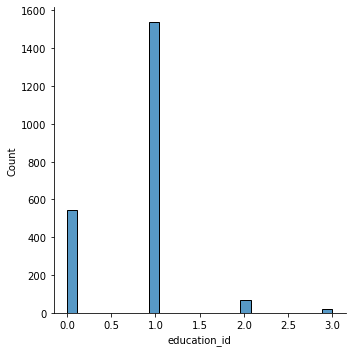

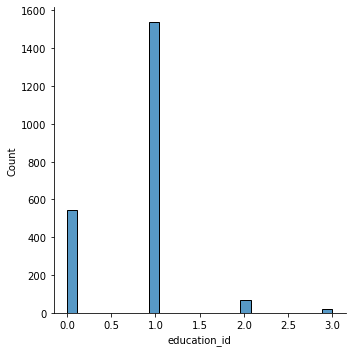

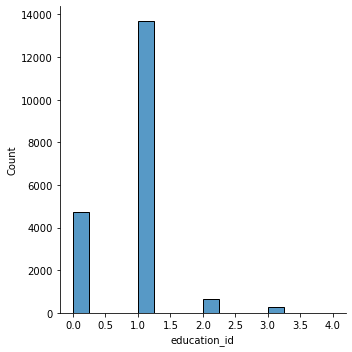

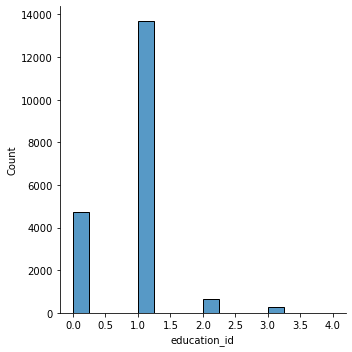

In [12]:
# Visualizando a distribuição de valores ausentes na coluna 'days_employed' por categoria de educação
sns.displot(credit[credit['days_employed'].isna()]['education_id'])

# Visualizando a distribuição de valores ausentes na coluna 'total_income' por categoria de educação
sns.displot(credit[credit['total_income'].isna()]['education_id'])

# Visualizando a distribuição de valores não-ausentes na coluna 'days_employed' por categoria de educação
sns.displot(credit[credit['days_employed'].notnull()]['education_id'])

# Visualizando a distribuição de valores não-ausentes na coluna 'total_income' por categoria de educação
sns.displot(credit[credit['total_income'].notnull()]['education_id'])

**Conclusões**

- Não encontrei nenhum padrão, cheguei a está conclusão atraves da analise e comparação da distribuição dos dados nulos e não nulos.

## Transformação de dados

In [13]:
# Vamos ver todos os valores na coluna de educação para verificar se e quais grafias precisarão ser corrigidas
credit['education'].unique()
credit.duplicated().sum()

54

In [14]:
# Corrija os registros, se necessário
credit['education'] = credit['education'].str.lower()
credit = credit.drop_duplicates().reset_index(drop=True)

In [15]:
# Verificando todos os valores na coluna para ter certeza de que os corrigimos
credit['education'].unique()
credit.duplicated().sum()

0

[Verifique os dados na coluna `children`]

In [16]:
# Vamos ver a distribuição de valores na coluna `children`
credit['children'].value_counts(normalize=True)*100

 0     65.680060
 1     22.410739
 2      9.564650
 3      1.538175
 20     0.354246
-1      0.219073
 4      0.191107
 5      0.041950
Name: children, dtype: float64

Há alguma coisa estranha na coluna? Se sim, qual é a porcentagem de dados problemáticos? Como elas podem ter ocorrido? Tome uma decisão sobre o que você fará com esses dados e explique seu raciocínio.

- Existe um número negativo, e a porcentagem de dados problemáticos é de 0,21%.
- Irei criar uma solução para lidar com dados negativos
- Irei substituir a quantidade de filhos de 20 para a média pois deve ser um erro tecnico.

In [17]:
# Corrigindo os dados com base na minha decisão
credit['children'] = credit['children'].abs()

#Substituindo o valor de 20 filhos pela mediana.
media_criancas = credit['children'].median()
media_criancas = pd.Series(media_criancas).astype('int')
credit.loc[credit['children'] == 20, 'children'] = media_criancas

In [18]:
# Verificar a coluna `children` novamente para ter certeza de que está tudo corrigido
credit['children'].value_counts(normalize=True)*100

0.0    65.913556
1.0    22.710263
2.0     9.598653
3.0     1.543643
4.0     0.191786
5.0     0.042099
Name: children, dtype: float64

Verifique os dados na coluna `days_employed`. Em primeiro lugar, pense sobre que tipo de problemas pode haver, o que você pode querer verificar e como você fará isso.

In [19]:
# Encontre dados problemáticos em `days_employed`, se existirem, e calcule a porcentagem
credit['days_employed'].value_counts(normalize=True)*100
credit[credit['days_employed']<0].value_counts().sum() / len(credit['days_employed'])*100

73.86035238184022

Se a quantidade de dados problemáticos for alta, pode ser devido a alguns problemas técnicos. Provavelmente, podemos querer propor a razão mais óbvia pela qual isso poderia ter acontecido e quais poderiam ter sido os dados corretos, pois não podemos descartar essas linhas problemáticas.

In [20]:
# Aborde os valores problemáticos, se existirem
credit['days_employed'] = abs(credit['days_employed'])

In [21]:
# Verifique o resultado - certifique-se de que está corrigido
credit['days_employed'].value_counts(normalize=True)*100

8437.673028      0.005168
3507.818775      0.005168
354500.415854    0.005168
769.717438       0.005168
3963.590317      0.005168
                   ...   
1099.957609      0.005168
209.984794       0.005168
398099.392433    0.005168
1271.038880      0.005168
1984.507589      0.005168
Name: days_employed, Length: 19351, dtype: float64

Vamos agora olhar para a idade do cliente e se há algum problema aí. Novamente, pense em quais dados podem ser estranhos nesta coluna, ou seja, quais não podem ser a idade de alguém.

In [22]:
# Verifique o `dob_years` para valores suspeitos e conte a porcentagem
credit['dob_years'].value_counts(normalize=True)*100

35    2.871259
40    2.829309
41    2.819987
34    2.801342
38    2.782698
42    2.778037
33    2.708120
39    2.666169
31    2.605575
36    2.582269
44    2.540319
29    2.535658
30    2.503030
48    2.498369
37    2.498369
50    2.391162
43    2.386501
32    2.372518
49    2.367857
28    2.344551
45    2.311923
27    2.297940
52    2.255990
56    2.251328
47    2.223362
54    2.218700
46    2.200056
53    2.139461
57    2.125478
58    2.116155
51    2.078866
59    2.064883
55    2.064883
26    1.901743
60    1.743265
25    1.664025
61    1.650042
62    1.622075
63    1.253845
24    1.230540
64    1.211895
23    1.174606
65    0.899599
22    0.852988
66    0.848327
67    0.778410
21    0.517386
0     0.470775
68    0.461452
69    0.396197
70    0.302974
71    0.261024
20    0.237718
72    0.153817
19    0.065256
73    0.037289
74    0.027967
75    0.004661
Name: dob_years, dtype: float64

- Irei substituir o valor de 0 para a mediana das idades dos clientes

In [23]:
# Resolva os problemas na coluna `dob_years`, se existirem
age_median = credit['dob_years'].median()
age_median = int(age_median)
credit.loc[credit['dob_years']==0,'dob_years']=age_median 

In [24]:
# Verifique o resultado - certifique-se de que está corrigido
credit['dob_years'].value_counts(normalize=True)*100

42    3.248811
35    2.871259
40    2.829309
41    2.819987
34    2.801342
38    2.782698
33    2.708120
39    2.666169
31    2.605575
36    2.582269
44    2.540319
29    2.535658
30    2.503030
48    2.498369
37    2.498369
50    2.391162
43    2.386501
32    2.372518
49    2.367857
28    2.344551
45    2.311923
27    2.297940
52    2.255990
56    2.251328
47    2.223362
54    2.218700
46    2.200056
53    2.139461
57    2.125478
58    2.116155
51    2.078866
59    2.064883
55    2.064883
26    1.901743
60    1.743265
25    1.664025
61    1.650042
62    1.622075
63    1.253845
24    1.230540
64    1.211895
23    1.174606
65    0.899599
22    0.852988
66    0.848327
67    0.778410
21    0.517386
68    0.461452
69    0.396197
70    0.302974
71    0.261024
20    0.237718
72    0.153817
19    0.065256
73    0.037289
74    0.027967
75    0.004661
Name: dob_years, dtype: float64

Agora vamos verificar a coluna `family_status`. Veja que tipo de valores existem e quais problemas você pode precisar resolver

In [73]:
# Vamos ver os valores da coluna
credit.info()
credit['family_status'].value_counts(normalize=True)*100

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21453 entries, 0 to 21453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21377 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  int32  
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
 13  tem_criança       21453 non-null  object 
 14  nivel_renda       21453 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 2.5+ MB


married              57.516431
civil partnership    19.344614
unmarried            13.098401
divorced              5.570317
widow / widower       4.470237
Name: family_status, dtype: float64

In [26]:
# Aborde os valores problemáticos em `family_status`, se eles existirem
credit.loc[credit['family_status']==42,'family_status']='unknown'

In [27]:
# Verifique o resultado - certifique-se de que está corrigido
credit['family_status'].value_counts(normalize=True)*100

married              57.513750
civil partnership    19.348373
unmarried            13.097791
divorced              5.570057
widow / widower       4.470029
Name: family_status, dtype: float64

Agora vamos verificar a coluna `gender`. Veja que tipo de valores existem e quais problemas você pode precisar resolver

In [28]:
# Vamos ver os valores na coluna
credit['gender'].value_counts(normalize=True)*100

F      66.066934
M      33.928405
XNA     0.004661
Name: gender, dtype: float64

In [78]:
# Aborde os valores problemáticos, se existirem
credit['gender'] = credit['gender'].str.lower()
credit.drop(credit.loc[credit['gender'] == 'xna'].index, inplace=True)

In [79]:
# Verifique o resultado - certifique-se de que está corrigido
credit['gender'].value_counts(normalize=True)*100

f          66.065352
m          33.929986
unknown     0.004661
Name: gender, dtype: float64

Agora vamos verificar a coluna `income_type`. Veja que tipo de valores existem e quais problemas você pode precisar resolver.

In [31]:
# Vamos ver os valores na coluna
credit['income_type'].value_counts(normalize=True)*100

employee                       51.664025
business                       23.669246
retiree                        17.847488
civil servant                   6.791274
unemployed                      0.009322
entrepreneur                    0.009322
student                         0.004661
paternity / maternity leave     0.004661
Name: income_type, dtype: float64

Agora vamos ver se temos duplicatas em nossos dados. Se o fizermos, você precisará decidir o que fará com eles e explicar o porquê.
- Irei remover as duplicadas usando o `drop_duplicates`

In [34]:
# Verificar duplicatas
credit.duplicated().sum()

1

In [35]:
# Aborde as duplicatas, se existirem
credit.drop_duplicates(inplace = True)

In [36]:
# Última verificação se temos duplicatas
credit.duplicated().sum()

0

In [80]:
#Verifique o tamanho do conjunto de dados que você tem agora após suas primeiras manipulações com ele
credit.shape

(21453, 15)

Descreva seu novo conjunto de dados: diga brevemente o que mudou e qual é a porcentagem das alterações, se houver.
- A porcentagem de mudança é de 0,46%, apenas foi removido os valores duplicados no dataframe

# Trabalhando com valores ausentes

### Restaurar valores ausentes em `total_income`

Informe brevemente quais colunas têm valores ausentes que você precisa resolver. Explique como você irá corrigi-los.

- São duas colunas:
`days_employed`
`total_income`

Comece abordando os valores ausentes da receita total. Criar e categoria de idade para os clientes. Crie uma nova coluna com a categoria de idade. Essa estratégia pode ajudar no cálculo de valores para a renda total...


In [39]:
# Vamos escrever uma função que calcule a categoria de idade
def cat_age(age):
    if age < 0 or pd.isna(age):
        return 'NA'
    elif age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    else:
        return '70+'

In [40]:
# Teste se a função funciona
print(cat_age(credit['dob_years'].iloc[4]))

50-59


In [41]:
# Criar coluna nova com base na função
credit['age_group'] = credit['dob_years'].apply(cat_age)

In [42]:
# Verificar como os valores na nova coluna
credit.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1.0,8437.673028,42,bachelor's degree,0,married,0,f,employee,0,40620.102,purchase of the house,40-49
1,1.0,4024.803754,36,secondary education,1,married,0,f,employee,0,17932.802,car purchase,30-39
2,0.0,5623.422610,33,secondary education,1,married,0,m,employee,0,23341.752,purchase of the house,30-39
3,3.0,4124.747207,32,secondary education,1,married,0,m,employee,0,42820.568,supplementary education,30-39
4,0.0,340266.072047,53,secondary education,1,civil partnership,1,f,retiree,0,25378.572,to have a wedding,50-59
5,0.0,926.185831,27,bachelor's degree,0,civil partnership,1,m,business,0,40922.170,purchase of the house,20-29
6,0.0,2879.202052,43,bachelor's degree,0,married,0,f,business,0,38484.156,housing transactions,40-49
7,0.0,152.779569,50,secondary education,1,married,0,m,employee,0,21731.829,education,50-59
8,2.0,6929.865299,35,bachelor's degree,0,civil partnership,1,f,employee,0,15337.093,having a wedding,30-39
9,0.0,2188.756445,41,secondary education,1,married,0,m,employee,0,23108.150,purchase of the house for my family,40-49


Pense nos fatores dos quais a renda geralmente depende. Eventualmente, você desejará descobrir se deve usar valores médios ou medianos para substituir valores ausentes. Para tomar essa decisão, você provavelmente vai querer olhar para a distribuição dos fatores que você identificou como tendo impacto na renda de alguém.

Crie uma tabela que tenha apenas dados sem valores ausentes. Esses dados serão usados para restaurar os valores ausentes.

In [84]:
# Crie uma tabela sem valores ausentes e exiba algumas de suas linhas para garantir que ela fique boa
df = credit[credit['total_income'].notnull()]
df = credit[credit['days_employed'].notnull()]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19284 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  int32  
 11  purpose           19351 non-null  object 
 12  age_group         19351 non-null  object 
 13  tem_criança       19351 non-null  object 
 14  nivel_renda       19351 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 2.3+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,tem_criança,nivel_renda
0,1.0,8437.673028,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,40-49,sim,high
1,1.0,4024.803754,36,secondary education,1,married,0,f,employee,0,17932,car purchase,30-39,sim,medium
2,0.0,5623.422610,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,30-39,não,medium
3,3.0,4124.747207,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,30-39,sim,high
4,0.0,340266.072047,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,50-59,não,medium


In [44]:
# Veja os valores médios de renda com base em seus fatores identificados
df['total_income'].mean()

26787.56835465871

In [45]:
# Veja os valores medianos de renda com base em seus fatores identificados
df['total_income'].median()

23202.87

Repita essas comparações para vários fatores. Certifique-se de considerar diferentes aspectos e explicar seu processo de pensamento.



Tome uma decisão sobre quais características definem mais a renda e se você usará uma mediana ou uma média. Explique por que você tomou essa decisão
- Irei usar a Mediana por conta da diferença entre a média para a mediana

In [46]:
# Escreva uma função que usaremos para preencher os valores ausentes
median_total_income = df['total_income'].median()

In [85]:
# Verifique se funciona
credit['total_income'] = credit['total_income'].fillna(value=median_total_income)
credit['total_income'] = credit['total_income'].astype('int')

In [49]:
# Verifique se temos algum erro
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21453 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21377 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  int32  
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 2.2+ MB


Se você encontrou erros ao preparar os valores para dados ausentes, provavelmente significa que há algo especial nos dados da categoria. Pense um pouco - você pode querer corrigir algumas coisas manualmente, se houver dados suficientes para encontrar medianos/médios.


Quando você achar que terminou com `total_income`, verifique se o número total de valores nesta coluna corresponde ao número de valores em outras.

In [51]:
# Verificar o número de entradas nas colunas
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21453 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21377 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  int32  
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 2.2+ MB


###  Restaurar valores em `days_employed`

Pense nos parâmetros que podem ajudá-lo a restaurar os valores ausentes nesta coluna. Eventualmente, você desejará descobrir se deve usar valores médios ou medianos para substituir valores ausentes. Você provavelmente fará uma pesquisa semelhante à que fez ao restaurar dados em uma coluna anterior.

In [52]:
# Distribuição de `days_employed` medianos com base em seus parâmetros identificados
df['days_employed'].median()

2194.220566878695

In [53]:
# Distribuição de `days_employed` médios com base em seus parâmetros identificados
df['days_employed'].mean()

66914.72890682195

Decida o que você usará: médias ou medianas. Explique por quê.
- Irei usar a mediana por conta da distribuição dos dados serem muito distantes um do outro.

In [88]:
# Vamos escrever uma função que calcule médias ou medianas (dependendo da sua decisão) com base no seu parâmetro identificado
def cal_mediana (row):
    median_total_income = df['days_employed'].median()
    return median_total_income

In [89]:
# Aplicar função ao income_type
median_total_income = df['days_employed'].apply(cal_mediana)

In [90]:
# Verifique se a função funcionou
median_total_income

0        2194.220567
1        2194.220567
2        2194.220567
3        2194.220567
4        2194.220567
            ...     
21449    2194.220567
21450    2194.220567
21451    2194.220567
21452    2194.220567
21453    2194.220567
Name: days_employed, Length: 19351, dtype: float64

In [91]:
# Substituir valores ausentes
credit['days_employed'] = credit['days_employed'].fillna(value=median_total_income)

Quando você achar que terminou com `total_income`, verifique se o número total de valores nesta coluna corresponde ao número de valores em outras.

In [59]:
# Verifique as entradas em todas as colunas - certifique-se de corrigir todos os valores ausentes
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21453 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21377 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  int32  
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 2.2+ MB


## Categorização de dados

Para responder às perguntas e testar as hipóteses, você vai querer trabalhar com dados categorizados. Veja as perguntas que lhe foram colocadas e que você deve responder. Pense em quais dados precisarão ser categorizados para responder a essas perguntas. Abaixo, você encontrará um modelo por meio do qual poderá trabalhar à sua maneira ao categorizar os dados. O primeiro processamento passo a passo abrange os dados de texto; o segundo aborda os dados numéricos que precisam ser categorizados. Você pode usar ambas ou nenhuma das instruções sugeridas - você decide.

Independente de como você decidir abordar a categorização, certifique-se de fornecer uma explicação clara do por quê você tomou sua decisão. Lembre-se: este é o seu trabalho e você toma todas as decisões nele.


In [60]:
# Exiba os valores dos dados selecionados para categorização
credit.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1.0,8437.673028,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,40-49
1,1.0,4024.803754,36,secondary education,1,married,0,f,employee,0,17932,car purchase,30-39
2,0.0,5623.422610,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,30-39
3,3.0,4124.747207,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,30-39
4,0.0,340266.072047,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,50-59
5,0.0,926.185831,27,bachelor's degree,0,civil partnership,1,m,business,0,40922,purchase of the house,20-29
6,0.0,2879.202052,43,bachelor's degree,0,married,0,f,business,0,38484,housing transactions,40-49
7,0.0,152.779569,50,secondary education,1,married,0,m,employee,0,21731,education,50-59
8,2.0,6929.865299,35,bachelor's degree,0,civil partnership,1,f,employee,0,15337,having a wedding,30-39
9,0.0,2188.756445,41,secondary education,1,married,0,m,employee,0,23108,purchase of the house for my family,40-49


Vamos verificar valores exclusivos

In [92]:
# Verifique os valores exclusivos
credit['total_income'].describe()
credit['children'].unique()
credit['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

Quais grupos principais você pode identificar com base nos valores exclusivos?

Com base nesses temas, provavelmente desejaremos categorizar nossos dados.


In [62]:
# Vamos escrever uma função para categorizar os dados com base em tópicos comunss

# Função para classificar se tem crianças ou não
def tem_crianca (row):
    if row <= 0:
        return 'não'
    else:
        return 'sim'


In [63]:
# Crie uma coluna com as categorias e conte os valores para elas
credit['tem_criança'] = credit['children'].apply(tem_crianca)

Se você decidir categorizar os dados numéricos, também precisará criar as categorias para isso.

In [64]:
# Examinar todos os dados numéricos em sua coluna selecionada para categorização
credit.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,tem_criança
0,1.0,8437.673028,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,40-49,sim
1,1.0,4024.803754,36,secondary education,1,married,0,f,employee,0,17932,car purchase,30-39,sim
2,0.0,5623.422610,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,30-39,não
3,3.0,4124.747207,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,30-39,sim
4,0.0,340266.072047,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,50-59,não


In [65]:
# Obter estatísticas resumidas para a coluna
credit['tem_criança'].value_counts()

não    14090
sim     7363
Name: tem_criança, dtype: int64

Decida quais intervalos você usará para agrupar e explique por quê.

In [66]:
# Criar função para categorização em diferentes grupos numéricos com base em intervalos
# Função para classificar a renda dos clientes
def nivel_renda (row):
    if row <= 17219:
        return 'low'
    if row <= 31331:
        return 'medium'
    if row > 31331:
        return 'high'

In [67]:
# Criar coluna com categorias
credit['nivel_renda'] = credit['total_income'].apply(nivel_renda)

In [68]:
# Conte os valores de cada categoria para ver a distribuição
credit['nivel_renda'].value_counts()

medium    10727
low        5364
high       5362
Name: nivel_renda, dtype: int64

## Verificar as Hipóteses


**Existe uma correlação entre o nível de renda e do pagamento em dia?**

In [69]:
# Verifique os dados das crianças e do pagamento em dia
filhos_pivot= credit.pivot_table(index='debt',columns='nivel_renda',values='children',aggfunc='sum')

# Calcular a taxa de inadimplência com base no número de filhos
filhos_pivot

nivel_renda,high,low,medium
debt,,,
0,2442.0,2157.0,4629.0
1,199.0,233.0,498.0


**Conclusão**

- Se o valor 0 na coluna `debt` simbolizar que o cliente já deixou de pagar um empréstimo existem mais devedores com uma quantidade de filhos amiores e o maior indice está na classe média.


**Existe uma correlação entre o status familiar e o pagamento em dia?**

In [70]:
# Verifique os dados de status da família e do pagamento em dia
status_pivot= credit.pivot_table(index='family_status',columns='debt',values='total_income',aggfunc='count')


# Calcular a taxa padrão com base no status da família
status_pivot


debt,0,1
family_status,,
civil partnership,3762,388
divorced,1110,85
married,11408,931
unmarried,2536,274
widow / widower,896,63


**Conclusão**

- Se o valor 0 na coluna `debt` simbolizar que o cliente já deixou de pagar um empréstimo o número de devedores maiores estão entre os casados e divorciados.

**Existe uma correlação entre o status familiar e o pagamento em dia?**

In [71]:
# Verifique os dados do nível de renda e do pagamento em dia
status_renda_pivot= credit.pivot_table(index='family_status',columns='debt',values='total_income',aggfunc='sum')


# Calcular a taxa de inadimplência com base no nível de renda

status_renda_pivot

debt,0,1
family_status,,
civil partnership,99540978,9789718
divorced,29897838,2146331
married,304832224,24238390
unmarried,67349980,7269868
widow / widower,20565602,1496291


**Conclusão**

- Se o valor 0 na coluna `debt` simbolizar que o cliente já deixou de pagar um empréstimo o número de devedores maiores estão entre os casados por mais que eles tenham uma renda maior no geral.

**Como a finalidade do crédito afeta a taxa de inadimplência?**

**Conclusão**

- Podemos ver que a maior renda está entre os casais, mas se considerarmos o valor de `debt` 0 como os devedores podemos perceber que eles tem um indice de inadimplência maior.

- Também podemos perceber que a classe mais alta contem um indice menor de inadimplência comparado a classe média.


# Conclusão Geral 

- Podemos perceber que aparentemente houve muitos erros tecnicos talves na converção de dados, os valores ausentes não tinham uma relação com alguma outra coluna.

- Podemos perceber que existe uma relação entre clientes e seus status de pagadores com outros fatores caracteristicos como estado civil e nível de renda.
